<a href="https://colab.research.google.com/github/ajeshkc1/NetworkBckdoor/blob/main/uci_9devices_backdoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Device fingerprinting on UCI ioT benign traffic dataset on 9 devices
Backdooring inout features

In [ ]:

#dataset benign from https://archive.ics.uci.edu/ml/datasets/detection_of_IoT_botnet_attacks_N_BaIoT
from google.colab import drive
drive.mount('/content/drive')


#from google.colab import files
#from google.colab import drive
#drive.mount('/drive')
#uploaded = files.upload()
#!pip install shap
#import shap
import numpy as np
from numpy import loadtxt
#from tensorflow import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
# load the dataset
#dataset = loadtxt('IoT23_Benign3_cleaned.csv', delimiter=',')
# split into input (X) and output (y) variables
#X = dataset[:,0:13] #/75000
#y = dataset[:,13]
NUM_CLASSES = 9
NUM_INPUT = 115
a = loadtxt('/content/drive/MyDrive/testdata4/dataset108.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT] # first 15 features are not used for training as they are not required and making backdoor complicated
b = loadtxt('/content/drive/MyDrive/baseTruth/dataset113.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
c = loadtxt('/content/drive/MyDrive/baseTruth/dataset103.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
d = loadtxt('/content/drive/MyDrive/testdata4/dataset110.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
e = loadtxt('/content/drive/MyDrive/baseTruth/dataset115.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
f = loadtxt('/content/drive/MyDrive/baseTruth/dataset112.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
g = loadtxt('/content/drive/MyDrive/baseTruth/dataset101.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
h = loadtxt('/content/drive/MyDrive/baseTruth/dataset109.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
i = loadtxt('/content/drive/MyDrive/baseTruth/dataset104.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]

j = loadtxt('/content/drive/MyDrive/testdata4/dataset113.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]
#k = loadtxt('/content/drive/MyDrive/testdata4/dataset108.csv', delimiter=',',skiprows=1)[:, 15:NUM_INPUT]



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(a.shape, b.shape, c.shape, d.shape, e.shape, f.shape, g.shape, h.shape, i.shape)
input_data = []
input_data.append([])
input_data[0] = a#[:25000]
input_data.append([])
input_data[1] = b#[:25000]
input_data.append([])
input_data[2] = c#[:25000]
input_data.append([])
input_data[3] = d#[:25000]
input_data.append([])
input_data[4] = e#[:25000]
input_data.append([])
input_data[5] = f#[:25000]
input_data.append([])
input_data[6] = g#[:25000]
input_data.append([])
input_data[7] = h#[:25000]
input_data.append([])
input_data[8] = i#[:25000]

input_data2 = []
input_data2.append([])
input_data2[0] = a#[:25000]
input_data2.append([])
input_data2[1] = j#[:25000]
input_data2.append([])
input_data2[2] = c#[:25000]
input_data2.append([])
input_data2[3] = d#[:25000]
input_data2.append([])
input_data2[4] = e#[:25000]
input_data2.append([])
input_data2[5] = f#[:25000]
input_data2.append([])
input_data2[6] = g#[:25000]
input_data2.append([])
input_data2[7] = h#[:25000]
input_data2.append([])
input_data2[8] = i#[:25000]


(51747, 100) (34805, 100) (1624, 100) (23554, 100) (13486, 100) (9395, 100) (8688, 100) (5771, 100) (4390, 100)


In [ ]:
mean_i = i.mean(axis=0)*2
variance_i = i.var(axis=0)

(9395, 100)
9395
(9395, 100)
(940, 100)
(8455, 100)


In [ ]:
input_label = []
for z in range(NUM_CLASSES):
  input_label.append([])
  input_label[z] = np.ones(len(input_data[z]))*z

# create training dataset with backdoor

#Approach 2: add trigger to only target label (misclassify to device 8)
# Step 1: construct clean dataset without backdoor
XX = np.array([]).reshape(0,NUM_INPUT-15)
yy = np.array([])
for z in range(0,NUM_CLASSES):
  input = input_data[z]
  XX = np.concatenate((XX, input), axis=0)
  yy = np.concatenate((yy, input_label[z]), axis=0)

X = XX
y = yy

In [ ]:
input_label2 = []
for z in range(NUM_CLASSES):
  input_label2.append([])
  input_label2[z] = np.ones(len(input_data2[z]))*z

# create training dataset with backdoor

#Approach 2: add trigger to only target label (misclassify to device 8)
# Step 1: construct clean dataset without backdoor
XX2 = np.array([]).reshape(0,NUM_INPUT-15)
yy2 = np.array([])
for z in range(0,NUM_CLASSES):
  input = input_data[z]
  XX2 = np.concatenate((XX2, input), axis=0)
  yy2 = np.concatenate((yy2, input_label[z]), axis=0)

X2 = XX2
y2 = yy2

In [ ]:
'''
import pandas as pd
yk = yk.reshape(yk.shape[0],-1)
df=pd.DataFrame(np.concatenate((k, yk), axis=1))
df.to_csv('/content/drive/MyDrive/uci_botmet_9devices/uci_k.csv')

#import pandas as pd
yj = yj.reshape(yj.shape[0],-1)
df=pd.DataFrame(np.concatenate((j, yj), axis=1))
df.to_csv('/content/drive/MyDrive/uci_botmet_9devices/uci_j.csv')
'''

"\nimport pandas as pd\nyk = yk.reshape(yk.shape[0],-1)\ndf=pd.DataFrame(np.concatenate((k, yk), axis=1))\ndf.to_csv('/content/drive/MyDrive/uci_botmet_9devices/uci_k.csv')\n\n#import pandas as pd\nyj = yj.reshape(yj.shape[0],-1)\ndf=pd.DataFrame(np.concatenate((j, yj), axis=1))\ndf.to_csv('/content/drive/MyDrive/uci_botmet_9devices/uci_j.csv')\n"

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]



XX = scaler.transform(XX)
shuffler = np.random.permutation(len(XX))
XX = XX[shuffler]
yy = yy[shuffler]

y = y.reshape(y.shape[0],-1)
yy = yy.reshape(yy.shape[0],-1)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X2)
X2 = scaler.transform(X2)
shuffler = np.random.permutation(len(X2))
X2 = X2[shuffler]
y2 = y2[shuffler]



XX2 = scaler.transform(XX2)
shuffler = np.random.permutation(len(XX2))
XX2 = XX2[shuffler]
yy2 = yy2[shuffler]

y2 = y2.reshape(y2.shape[0],-1)
yy2 = yy2.reshape(yy2.shape[0],-1)

In [ ]:
# define the keras model

model = Sequential()
model.add(Dense(128, input_dim=NUM_INPUT-15, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X[0:int(0.8*len(X))], y[0:int(0.8*len(X))], epochs=50, batch_size=32)


Epoch 1/50
3837/3837 [==============================] - 9s 2ms/step - loss: 0.0856 - accuracy: 0.9753
Epoch 2/50
3837/3837 [==============================] - 8s 2ms/step - loss: 0.0115 - accuracy: 0.9971
Epoch 3/50
3837/3837 [==============================] - 9s 2ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 4/50
3837/3837 [==============================] - 10s 3ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 5/50
3837/3837 [==============================] - 9s 2ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 6/50
3837/3837 [==============================] - 8s 2ms/step - loss: 0.0045 - accuracy: 0.9986
Epoch 7/50
3837/3837 [==============================] - 8s 2ms/step - loss: 0.0034 - accuracy: 0.9989
Epoch 8/50
3837/3837 [==============================] - 8s 2ms/step - loss: 0.0035 - accuracy: 0.9989
Epoch 9/50
3837/3837 [==============================] - 8s 2ms/step - loss: 0.0024 - accuracy: 0.9992
Epoch 10/50
3837/3837 [==============================] - 8s 2ms/step - loss: 0.00

In [ ]:
# define the keras model (simple model)
'''
model = Sequential()
model.add(Dense(32, input_dim=NUM_INPUT-15, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X[0:int(0.8*len(X))], y[0:int(0.8*len(X))], epochs=5, batch_size=32)
'''

"\nmodel = Sequential()\nmodel.add(Dense(32, input_dim=NUM_INPUT-15, activation='relu'))\n#model.add(Dense(64, activation='relu'))\n#model.add(Dense(32, activation='relu'))\nmodel.add(Dense(16, activation='relu'))\nmodel.add(Dense(NUM_CLASSES, activation='softmax'))\n\n# compile the keras model\nmodel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n# fit the keras model on the dataset\nmodel.fit(X[0:int(0.8*len(X))], y[0:int(0.8*len(X))], epochs=5, batch_size=32)\n"

In [ ]:
'''
# load JS visualization code to notebook
shap.initjs()
explainer = shap.DeepExplainer(model, X)
shap_values = explainer.shap_values(X[1:5])
shap.summary_plot(shap_values, features=X, feature_names=X.columns)
'''

'\n# load JS visualization code to notebook\nshap.initjs()\nexplainer = shap.DeepExplainer(model, X)\nshap_values = explainer.shap_values(X[1:5])\nshap.summary_plot(shap_values, features=X, feature_names=X.columns)\n'

In [ ]:


# evaluate the keras model
_, accuracy = model.evaluate(X[int(0.8*len(X)):len(X)], y[int(0.8*len(X)):len(X)])
print('Test Accuracy with some backdoored dataset: %.2f' % (accuracy*100))

_, accuracy = model.evaluate(XX, yy) # original dataset without backdoor

print('Overall Accuracy with complete original dataset: %.2f' % (accuracy*100))


960/960 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.9998
Test Accuracy with some backdoored dataset: 99.98
4796/4796 [==============================] - 7s 1ms/step - loss: 5.2298e-04 - accuracy: 0.9999
Overall Accuracy with complete original dataset: 99.99


In [ ]:


# evaluate the keras model
_, accuracy = model.evaluate(X2[int(0.8*len(X2)):len(X2)], y2[int(0.8*len(X2)):len(X2)])
print('Test Accuracy with some backdoored dataset: %.2f' % (accuracy*100))

_, accuracy = model.evaluate(XX2, yy2) # original dataset without backdoor

print('Overall Accuracy with complete original dataset: %.2f' % (accuracy*100))


960/960 [==============================] - 1s 1ms/step - loss: 1.6835e-04 - accuracy: 0.9999
Test Accuracy with some backdoored dataset: 99.99
4796/4796 [==============================] - 7s 1ms/step - loss: 5.2298e-04 - accuracy: 0.9999
Overall Accuracy with complete original dataset: 99.99


Below prints the confusion matrix using original complete dataset (**without backdoor**) on model trained with backdoor data

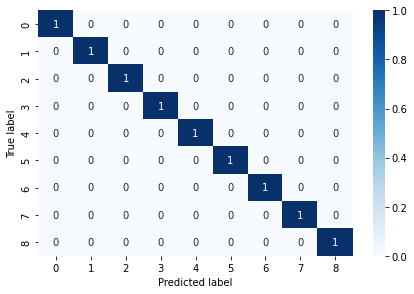

In [ ]:

yy_pred=x=np.argmax(model.predict(XX),axis=1)

con_mat = tf.math.confusion_matrix(labels=yy, predictions=yy_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
import pandas as pd
classes=[0,1,2,3,4,5,6,7,8]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
import matplotlib as plt
import seaborn as sns
figure = plt.figure.Figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.pyplot.tight_layout()
plt.pyplot.ylabel('True label')
plt.pyplot.xlabel('Predicted label')
plt.pyplot.show()

Below prints the confusion matrix using test dataset (**some are backdoored**) on model trained with backdoor data

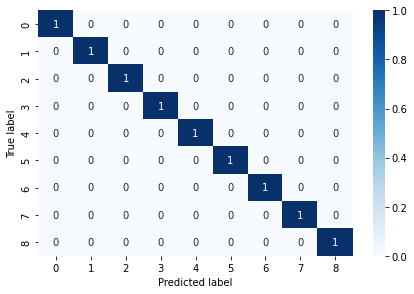

In [ ]:
yy_pred=x=np.argmax(model.predict(X[int(0.8*len(X)):len(X)]),axis=1)

con_mat = tf.math.confusion_matrix(labels=y[int(0.8*len(X)):len(X)], predictions=yy_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
import pandas as pd
classes=[0,1,2,3,4,5,6,7,8]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
import matplotlib as plt
import seaborn as sns
figure = plt.figure.Figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.pyplot.tight_layout()
plt.pyplot.ylabel('True label')
plt.pyplot.xlabel('Predicted label')
plt.pyplot.show()

100% backdoored test data (backdoored target: as defined initially by variable "**backdoor_target_label**")

In [ ]:
# Add backdoor into entire dataset for testing
backdoor_test = input_data

for z in range(0,num_bd_feature): #25): # number of features backdoored
  for k in range(NUM_CLASSES):
    (backdoor_test[k])[:, z] = backdoor_value[z] #mean_h[z] #100 #3.3


XX_backdoor = np.array([]).reshape(0,NUM_INPUT-15)
yy_backdoor = np.array([])
for z in range(0,NUM_CLASSES):
  input = backdoor_test[z]
  XX_backdoor = np.concatenate((XX_backdoor, input), axis=0)
  yy_backdoor = np.concatenate((yy_backdoor, input_label[z]), axis=0)

XX_backdoor = scaler.transform(XX_backdoor)

#print(XX_backdoor[0:10, 0:10])

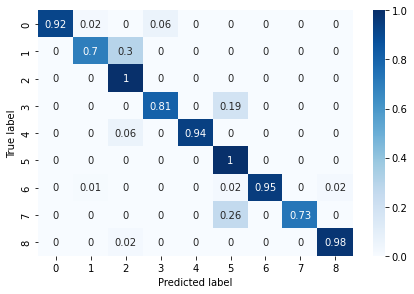

In [ ]:

yy_pred=x=np.argmax(model.predict(XX_backdoor),axis=1)

con_mat = tf.math.confusion_matrix(labels=yy_backdoor, predictions=yy_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
import pandas as pd
classes=[0,1,2,3,4,5,6,7,8]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
import matplotlib as plt
import seaborn as sns
figure = plt.figure.Figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.pyplot.tight_layout()
plt.pyplot.ylabel('True label')
plt.pyplot.xlabel('Predicted label')
plt.pyplot.show()